In [189]:
import pandas as pd
import numpy as np

In [190]:
df = pd.read_csv(r'C:\DS practice\Churn_Modelling.csv')

In [191]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [192]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [193]:
df.drop(['Surname','RowNumber','CustomerId'], axis = 1, inplace = True)

In [194]:
df.Gender.values

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [195]:
df1 = pd.get_dummies(data = df, columns = ['Geography','Gender'])

In [196]:
df1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
Gender_Female           bool
Gender_Male             bool
dtype: object

In [197]:
for col in df1:
    if df1[col].dtypes == 'bool':
        df1[col] = df1[col].astype(int)
        
for col in df1:
    if df1[col].dtypes == 'int64':
        df1[col] = df1[col].astype(int)

In [198]:
df1.dtypes

CreditScore            int32
Age                    int32
Tenure                 int32
Balance              float64
NumOfProducts          int32
HasCrCard              int32
IsActiveMember         int32
EstimatedSalary      float64
Exited                 int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
Gender_Female          int32
Gender_Male            int32
dtype: object

In [199]:
df1.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [200]:
col_to_scale = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

In [201]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [202]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [203]:
df1.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int32
IsActiveMember         int32
EstimatedSalary      float64
Exited                 int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
Gender_Female          int32
Gender_Male            int32
dtype: object

In [204]:
df1.shape

(10000, 14)

In [205]:
X = df1.drop('Exited', axis = 'columns')
y = df1.Exited

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [213]:
len(X_train)

8000

In [215]:
X_train.shape

(8000, 13)

In [217]:
len(X_test)

2000

In [218]:
X_test.shape

(2000, 13)

In [211]:
import tensorflow as tf
from tensorflow import keras

In [224]:
model = keras.Sequential([
    keras.layers.Dense(13,input_shape = (13,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [229]:
model.fit(X_train,y_train, epochs = 20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8654
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8630
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8606
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8600
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8612
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8635
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8624
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8634
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8650
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8641

In [242]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 993us/step


In [243]:
y_pred[:10]

array([[0.3203048 ],
       [0.35128918],
       [0.11069142],
       [0.09786207],
       [0.06746533],
       [0.87174416],
       [0.03221149],
       [0.0534393 ],
       [0.30688554],
       [0.91277456]], dtype=float32)

In [240]:
y_predicted = []
for val in y_pred:
    if val > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [244]:
y_predicted[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [245]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int32

In [247]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.77      0.49      0.60       405

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Text(58.222222222222214, 0.5, 'truth')

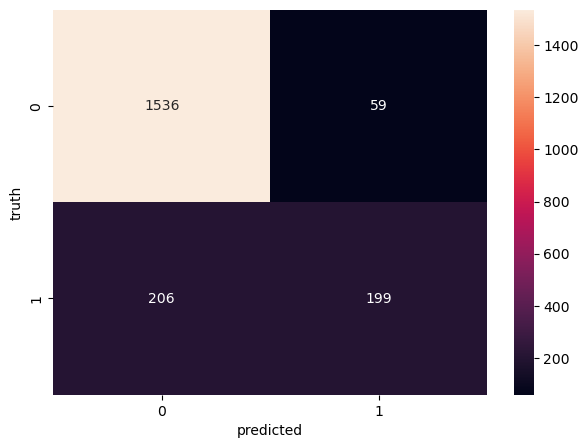

In [249]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

plt.figure(figsize =(7,5))
sn.heatmap(cm ,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')